In [208]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import os
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 40)

In [209]:
PATH = os.path.dirname(os.getcwd())
DATA_PATH = f"{PATH}\\Datas"
MODEL_PATH = f"{PATH}\\Model"
PATH


'c:\\Users\\chain\\2nd year\\datasci\\project\\ScopusData2018-2023'

In [210]:
def readCSV(filepath):
    df = pd.read_csv(filepath)
    df.index = df["Unnamed: 0"].values
    df.drop(labels= "Unnamed: 0",axis = 1,inplace=True)
    return df

In [211]:
df = readCSV(f"{DATA_PATH}/cleanedData.csv")
df.drop(labels = ["prism:volume" , "prism:coverDate" , "openaccessFlag","dc:description"], axis = 1, inplace=True)
df.dropna(subset="citedby-count",axis=0,inplace=True)
df.info()

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\chain\\2nd year\\datasci\\project\\ScopusData2018-2023\\Datas/cleanedData.csv'

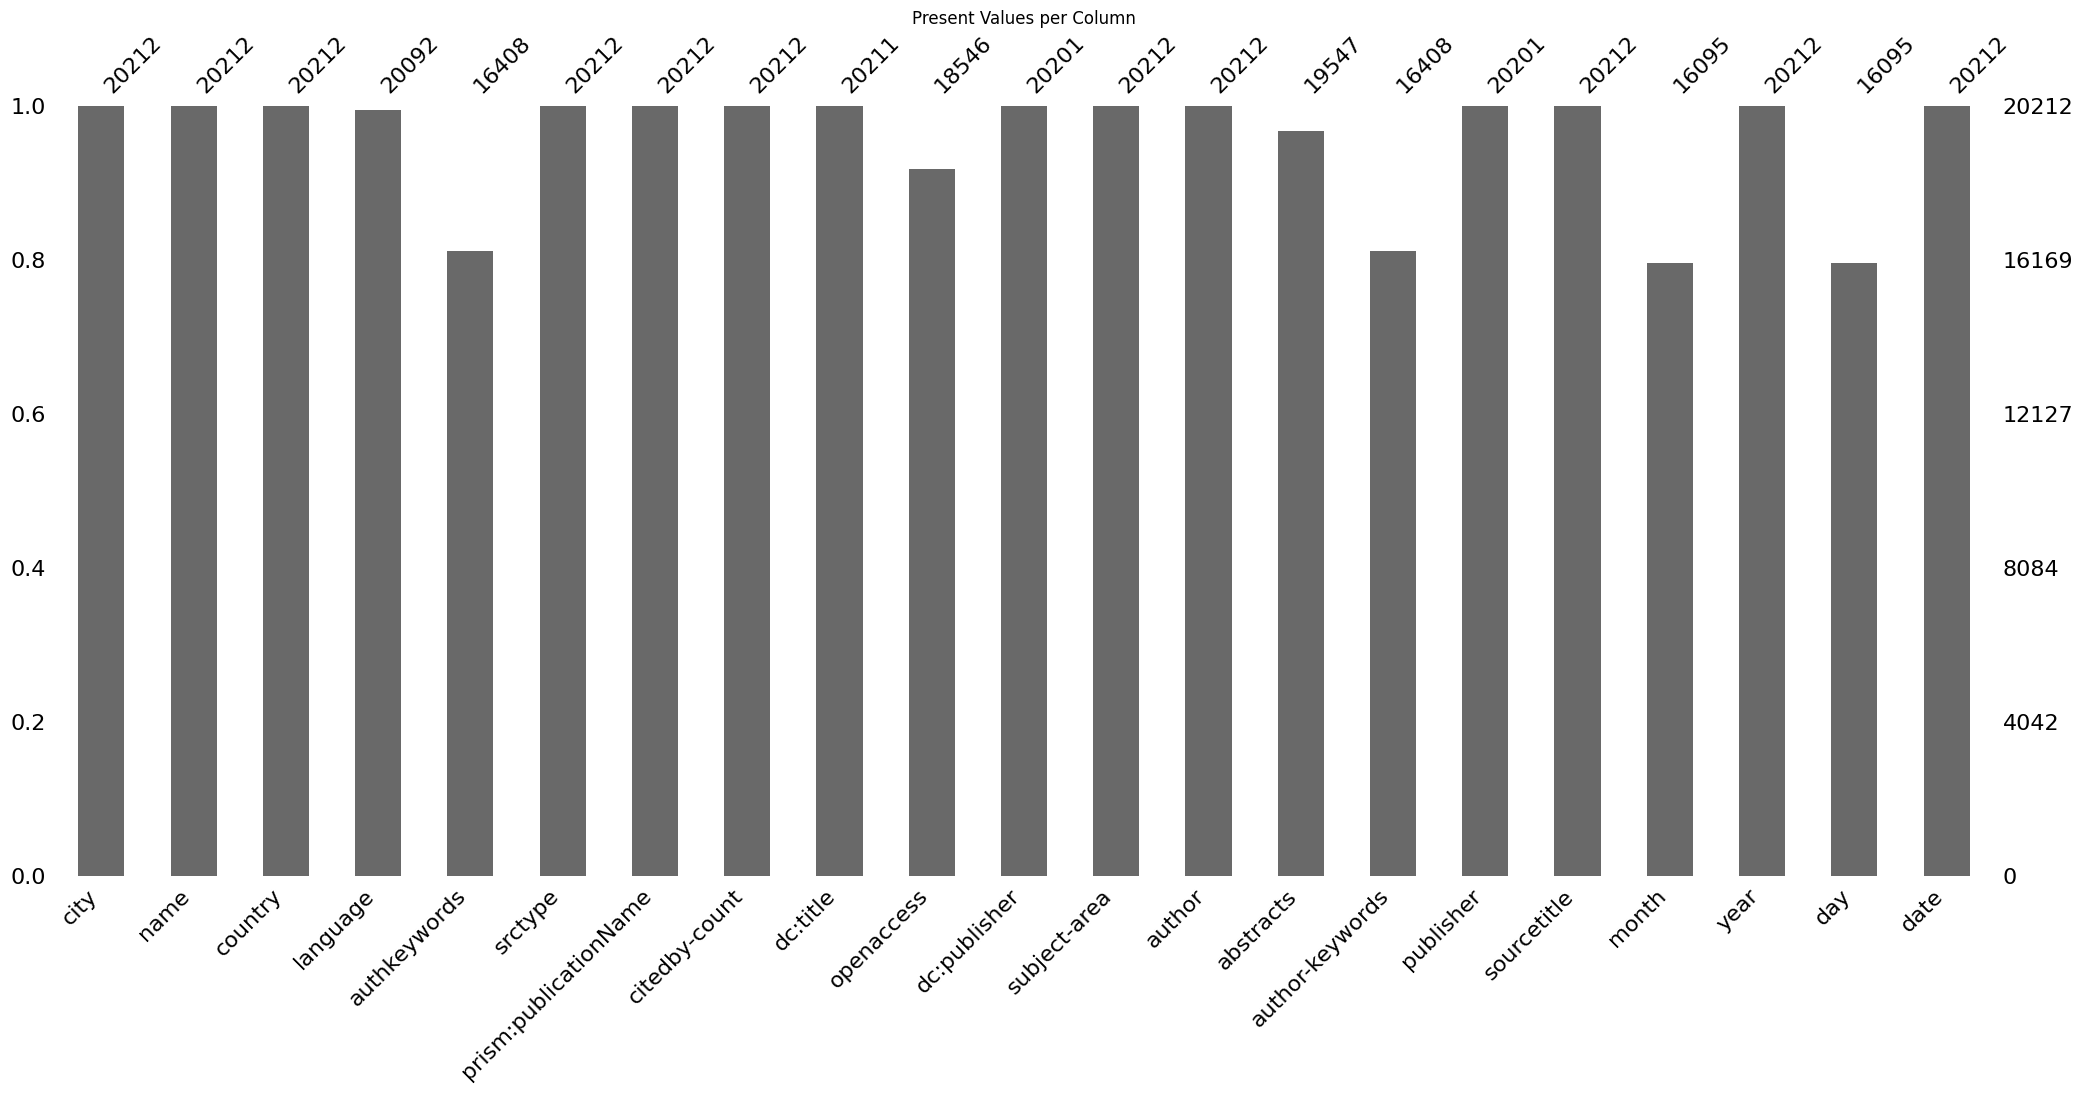

,city,name,country,language,authkeywords,srctype,prism:publicationName,citedby-count,dc:title,openaccess,dc:publisher,subject-area,author,abstracts,author-keywords,publisher,sourcetitle,month,year,day,date
201800000,"['Stanford', 'Bangkok', 'Bangkok', 'Stanford',...","['Stanford University School of Medicine', 'Ch...","['United States', 'Thailand', 'Thailand', 'Uni...",eng,NaN,b,"Radiology in Global Health: Strategies, Implem...",1.0,Public health and international epidemiology f...,0.0,Springer International Publishing,Medicine (all),"['Pongpirul K.', 'Lungren M.P.']",NaN,NaN,Springer International Publishing,"Radiology in Global Health: Strategies, Implem...",12.0,2018,31.0,2018-12-31
201800001,['Baltimore'],['Johns Hopkins Bloomberg School of Public Hea...,['United States'],eng,NaN,p,Progress in Electromagnetics Research Symposium,1.0,Flexible Printed Active Antenna for Digital Te...,0.0,Institute of Electrical and Electronics Engine...,"Electrical and Electronic Engineering, Electro...","['Pratumsiri T.', 'Janpugdee P.']","© 2018 The Institute of Electronics, Informati...",NaN,Institute of Electrical and Electronics Engine...,Progress in Electromagnetics Research Symposium,12.0,2018,31.0,2018-12-31
201800002,['Baltimore'],['Johns Hopkins Bloomberg School of Public Hea...,['United States'],eng,"Circulating fluidized bed, Computational fluid...",j,Chemical Engineering Science,21.0,Parametric study of hydrogen production via so...,0.0,Elsevier Ltd,"Chemistry (all), Chemical Engineering (all), I...","['Phuakpunk K.', 'Chalermsinsuwan B.', 'Putivi...",© 2018 Elsevier LtdComputational fluid dynamic...,"Circulating fluidized bed, Computational fluid...",Elsevier Ltd,Chemical Engineering Science,12.0,2018,31.0,2018-12-31
201800003,"['Hirosaki', 'Bangkok', 'Pathum Thani', 'Nagoy...","['Hirosaki University', 'Chulalongkorn Univers...","['Japan', 'Thailand', 'Thailand', 'Japan', 'Th...",eng,"Encapsulation, Fluoroalkylsilane, Natural rubb...",j,Applied Surface Science,37.0,Superhydrophobic coating from fluoroalkylsilan...,0.0,Elsevier B.V.,"Chemistry (all), Condensed Matter Physics, Phy...","['Saengkaew J.', 'Le D.', 'Samart C.', 'Sawada...",© 2018 Elsevier B.V. A superhydrophobic/supero...,"Encapsulation, Fluoroalkylsilane, Natural rubb...",Elsevier B.V.,Applied Surface Science,12.0,2018,31.0,2018-12-31
201800004,"['Bangkok', 'Pathum Thani', 'Fort Collins', 'B...","['Chulalongkorn University', 'Thailand Nationa...","['Thailand', 'Thailand', 'United States', 'Tha...",eng,"acpcPNA, Electrochemical impedance spectroscop...",j,Analytica Chimica Acta,68.0,Electrochemical impedance-based DNA sensor usi...,0.0,Elsevier B.V.,"Analytical Chemistry, Biochemistry, Environmen...","['Teengam P.', 'Siangproh W.', 'Tuantranont A....",© 2018 Elsevier B.V. A label-free electrochemi...,"acpcPNA, Electrochemical impedance spectroscop...",Elsevier B.V.,Analytica Chimica Acta,12.0,2018,31.0,2018-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202302885,"['Bangkok', 'Bangkok']","['Chulalongkorn University', 'Center of Excell...","['Thailand', 'Thailand']",eng,"Long-chain olefins, Mesoporous KIT-6, Oleic ac...",j,Catalysis Today,3.0,Long-chain bio-olefins production via oxidativ...,0.0,Elsevier B.V.,"Catalysis, Chemistry (all)","['Le D.', 'Chaidherasuwet N.', 'Rueangthaweep ...",© 2021 Elsevier B.V.Long-chain α-olefins (≥ C1...,"Long-chain olefins, Mesoporous KIT-6, Oleic ac...",Elsevier B.V.,Catalysis Today,1.0,2023,1.0,2023-01-01
202302886,['Bangkok'],['Center of Excellence on Petrochemical and Ma...,['Thailand'],eng,"Biological hazards, chemical hazards, food con...",j,Critical Reviews in Analytical Chemistry,11.0,Recent Developments and Applications of Microf...,0.0,Taylor and Francis Ltd.,Analytical Chemistry,"['Alahmad W.', 'Varanusupakul P.', 'Varanusupa...","© 2021 Taylor & Francis Group, LLC.Nowadays, f...","Biological hazards, chemical hazards, food con...",Taylor and Francis Ltd.,Critical Reviews in 

In [ ]:
msno.bar(df)
plt.title("Present Values per Column")
plt.show()
df

In [ ]:
def obj2text(l):
    if isinstance(l,bool):
        return l
    if not isinstance(l,str):
        return ""
    if l == "":
        return ""
    if l[0] != "[":
        return l
    return l[1:-1].replace("'","")



In [ ]:
for col in df.select_dtypes(include="object"):
    df[col] = df[col].apply(obj2text)
df["openaccess"].fillna(0, inplace=True)
df["month"].fillna(1,inplace=True)
df["day"].fillna(1,inplace=True)
df["date"] = pd.to_datetime(df[["year", "month", "day"]])

C:\Users\chain\AppData\Local\Temp\ipykernel_8884\2765852534.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["openaccess"].fillna(0, inplace=True)
C:\Users\chain\AppData\Local\Temp\ipykernel_8884\2765852534.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

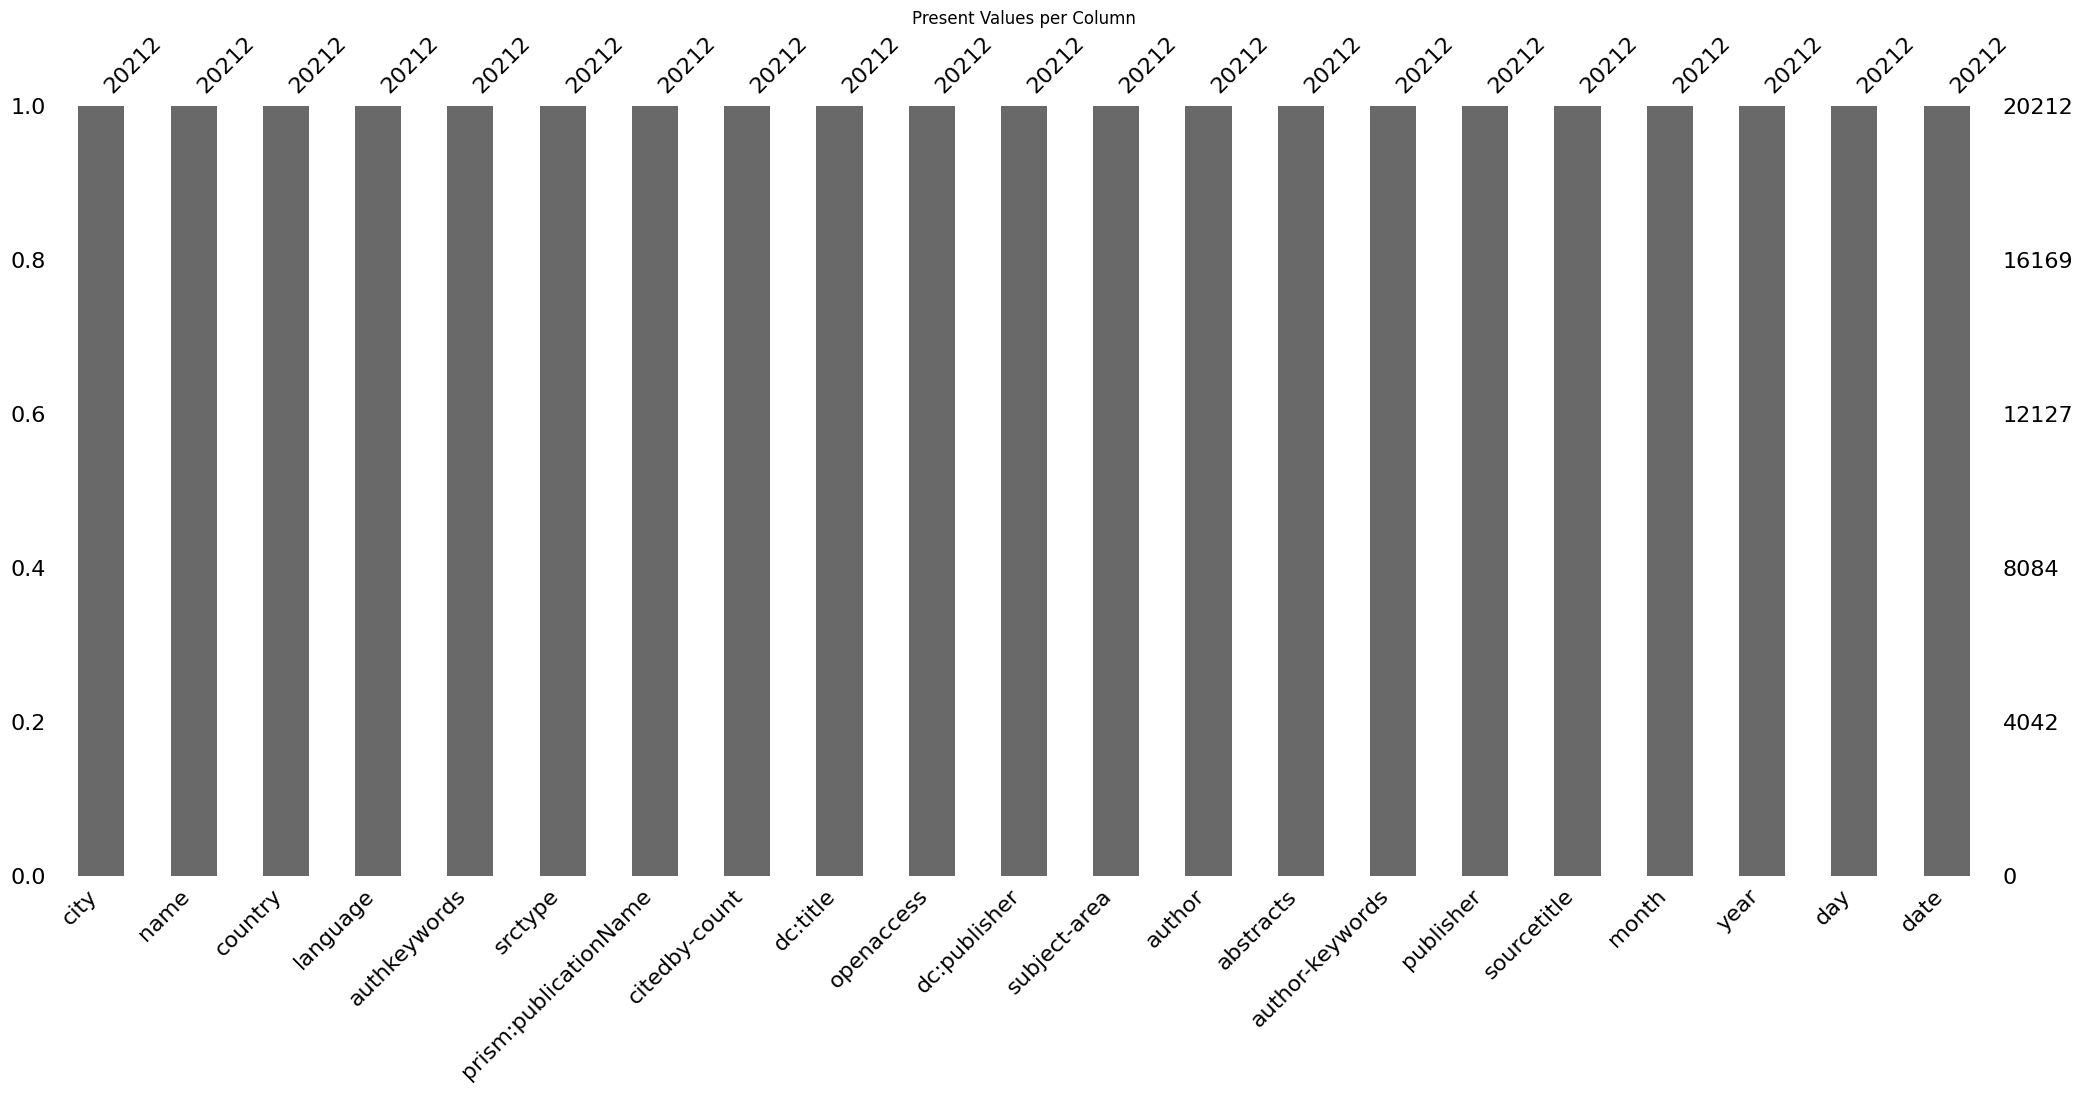

,city,name,country,language,authkeywords,srctype,prism:publicationName,citedby-count,dc:title,openaccess,dc:publisher,subject-area,author,abstracts,author-keywords,publisher,sourcetitle,month,year,day,date
201800000,"Stanford, Bangkok, Bangkok, Stanford, Palo Alt...","Stanford University School of Medicine, Chulal...","United States, Thailand, Thailand, United Stat...",eng,,b,"Radiology in Global Health: Strategies, Implem...",1.0,Public health and international epidemiology f...,0.0,Springer International Publishing,Medicine (all),"Pongpirul K., Lungren M.P.",,,Springer International Publishing,"Radiology in Global Health: Strategies, Implem...",12.0,2018,31.0,2018-12-31
201800001,Baltimore,Johns Hopkins Bloomberg School of Public Health,United States,eng,,p,Progress in Electromagnetics Research Symposium,1.0,Flexible Printed Active Antenna for Digital Te...,0.0,Institute of Electrical and Electronics Engine...,"Electrical and Electronic Engineering, Electro...","Pratumsiri T., Janpugdee P.","© 2018 The Institute of Electronics, Informati...",,Institute of Electrical and Electronics Engine...,Progress in Electromagnetics Research Symposium,12.0,2018,31.0,2018-12-31
201800002,Baltimore,Johns Hopkins Bloomberg School of Public Health,United States,eng,"Circulating fluidized bed, Computational fluid...",j,Chemical Engineering Science,21.0,Parametric study of hydrogen production via so...,0.0,Elsevier Ltd,"Chemistry (all), Chemical Engineering (all), I...","Phuakpunk K., Chalermsinsuwan B., Putivisutisa...",© 2018 Elsevier LtdComputational fluid dynamic...,"Circulating fluidized bed, Computational fluid...",Elsevier Ltd,Chemical Engineering Science,12.0,2018,31.0,2018-12-31
201800003,"Hirosaki, Bangkok, Pathum Thani, Nagoya, Nakho...","Hirosaki University, Chulalongkorn University,...","Japan, Thailand, Thailand, Japan, Thailand, Th...",eng,"Encapsulation, Fluoroalkylsilane, Natural rubb...",j,Applied Surface Science,37.0,Superhydrophobic coating from fluoroalkylsilan...,0.0,Elsevier B.V.,"Chemistry (all), Condensed Matter Physics, Phy...","Saengkaew J., Le D., Samart C., Sawada H., Nis...",© 2018 Elsevier B.V. A superhydrophobic/supero...,"Encapsulation, Fluoroalkylsilane, Natural rubb...",Elsevier B.V.,Applied Surface Science,12.0,2018,31.0,2018-12-31
201800004,"Bangkok, Pathum Thani, Fort Collins, Bangkok","Chulalongkorn University, Thailand National El...","Thailand, Thailand, United States, Thailand",eng,"acpcPNA, Electrochemical impedance spectroscop...",j,Analytica Chimica Acta,68.0,Electrochemical impedance-based DNA sensor usi...,0.0,Elsevier B.V.,"Analytical Chemistry, Biochemistry, Environmen...","Teengam P., Siangproh W., Tuantranont A., Vila...",© 2018 Elsevier B.V. A label-free electrochemi...,"acpcPNA, Electrochemical impedance spectroscop...",Elsevier B.V.,Analytica Chimica Acta,12.0,2018,31.0,2018-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202302885,"Bangkok, Bangkok","Chulalongkorn University, Center of Excellence...","Thailand, Thailand",eng,"Long-chain olefins, Mesoporous KIT-6, Oleic ac...",j,Catalysis Today,3.0,Long-chain bio-olefins production via oxidativ...,0.0,Elsevier B.V.,"Catalysis, Chemistry (all)","Le D., Chaidherasuwet N., Rueangthaweep A., Ku...",© 2021 Elsevier B.V.Long-chain α-olefins (≥ C1...,"Long-chain olefins, Mesoporous KIT-6, Oleic ac...",Elsevier B.V.,Catalysis Today,1.0,2023,1.0,2023-01-01
202302886,Bangkok,Center of Excellence on Petrochemical and Mate...,Thailand,eng,"Biological hazards, chemical hazards, food con...",j,Critical Reviews in Analytical Chemistry,11.0,Recent Developments and Applications of Microf...,0.0,Taylor and Francis Ltd.,Analytical Chemistry,"Alahmad W., Varanusupakul P., Varanusupakul P.","© 2021 Taylor & Francis Group, LLC.Nowadays, f...","Biological hazards, chemical hazards, food con...",Taylor and Francis Ltd.,Critical Reviews in Analytical Chemistry,1.0,2023,1.0,2023-01-01
202302887,"Bangkok, London","Chulalo

In [ ]:
msno.bar(df)
plt.title("Present Values per Column")
plt.show()
df

In [ ]:
df.to_csv(f"{DATA_PATH}\\Data4Visualization.csv", index=True)


In [ ]:
df.info()

cat_col = ["srctype"]
text_col = [col for col in df.select_dtypes(exclude="number").columns if col not in cat_col]
num_col = df.select_dtypes(include="number").columns

<class 'pandas.core.frame.DataFrame'>
Index: 20212 entries, 201800000 to 202302889
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   city                   20212 non-null  object        
 1   name                   20212 non-null  object        
 2   country                20212 non-null  object        
 3   language               20212 non-null  object        
 4   authkeywords           20212 non-null  object        
 5   srctype                20212 non-null  object        
 6   prism:publicationName  20212 non-null  object        
 7   citedby-count          20212 non-null  float64       
 8   dc:title               20212 non-null  object        
 9   openaccess             20212 non-null  float64       
 10  dc:publisher           20212 non-null  object        
 11  subject-area           20212 non-null  object        
 12  author                 20212 non-null  object        

In [ ]:
df.groupby("year")["citedby-count"].mean()

year
2018    16.853152
2019    14.375081
2020    13.492775
2021     8.643250
2022     3.488219
2023     0.715720
Name: citedby-count, dtype: float64

In [ ]:
def combineAfil(df: pd.DataFrame) -> pd.DataFrame:
    rows = []
    
    for row in df.itertuples(index=False):
        names = row.name.split(", ")
        countries = row.country.split(", ")
        cities = row.city.split(", ")
        
        # assume the three lists have same length
        parts = [
            f"{n} from {ci}, {co}"
            for n, ci, co in zip(names, cities, countries)
        ]
        result = "\n".join(parts)
        rows.append([result])
    
    return pd.DataFrame(rows, columns=["combined"],index=df.index)

# usage
df = pd.concat([combineAfil(df) , df] ,axis=1)
df.drop(labels = ["city" , "name" , "country"] , axis = 1,inplace = True)
df

,combined,language,authkeywords,srctype,prism:publicationName,citedby-count,dc:title,openaccess,dc:publisher,subject-area,author,abstracts,author-keywords,publisher,sourcetitle,month,year,day,date
201800000,Stanford University School of Medicine from St...,eng,,b,"Radiology in Global Health: Strategies, Implem...",1.0,Public health and international epidemiology f...,0.0,Springer International Publishing,Medicine (all),"Pongpirul K., Lungren M.P.",,,Springer International Publishing,"Radiology in Global Health: Strategies, Implem...",12.0,2018,31.0,2018-12-31
201800001,Johns Hopkins Bloomberg School of Public Healt...,eng,,p,Progress in Electromagnetics Research Symposium,1.0,Flexible Printed Active Antenna for Digital Te...,0.0,Institute of Electrical and Electronics Engine...,"Electrical and Electronic Engineering, Electro...","Pratumsiri T., Janpugdee P.","© 2018 The Institute of Electronics, Informati...",,Institute of Electrical and Electronics Engine...,Progress in Electromagnetics Research Symposium,12.0,2018,31.0,2018-12-31
201800002,Johns Hopkins Bloomberg School of Public Healt...,eng,"Circulating fluidized bed, Computational fluid...",j,Chemical Engineering Science,21.0,Parametric study of hydrogen production via so...,0.0,Elsevier Ltd,"Chemistry (all), Chemical Engineering (all), I...","Phuakpunk K., Chalermsinsuwan B., Putivisutisa...",© 2018 Elsevier LtdComputational fluid dynamic...,"Circulating fluidized bed, Computational fluid...",Elsevier Ltd,Chemical Engineering Science,12.0,2018,31.0,2018-12-31
201800003,"Hirosaki University from Hirosaki, Japan\nChul...",eng,"Encapsulation, Fluoroalkylsilane, Natural rubb...",j,Applied Surface Science,37.0,Superhydrophobic coating from fluoroalkylsilan...,0.0,Elsevier B.V.,"Chemistry (all), Condensed Matter Physics, Phy...","Saengkaew J., Le D., Samart C., Sawada H., Nis...",© 2018 Elsevier B.V. A superhydrophobic/supero...,"Encapsulation, Fluoroalkylsilane, Natural rubb...",Elsevier B.V.,Applied Surface Science,12.0,2018,31.0,2018-12-31
201800004,"Chulalongkorn University from Bangkok, Thailan...",eng,"acpcPNA, Electrochemical impedance spectroscop...",j,Analytica Chimica Acta,68.0,Electrochemical impedance-based DNA sensor usi...,0.0,Elsevier B.V.,"Analytical Chemistry, Biochemistry, Environmen...","Teengam P., Siangproh W., Tuantranont A., Vila...",© 2018 Elsevier B.V. A label-free electrochemi...,"acpcPNA, Electrochemical impedance spectroscop...",Elsevier B.V.,Analytica Chimica Acta,12.0,2018,31.0,2018-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202302885,"Chulalongkorn University from Bangkok, Thailan...",eng,"Long-chain olefins, Mesoporous KIT-6, Oleic ac...",j,Catalysis Today,3.0,Long-chain bio-olefins production via oxidativ...,0.0,Elsevier B.V.,"Catalysis, Chemistry (all)","Le D., Chaidherasuwet N., Rueangthaweep A., Ku...",© 2021 Elsevier B.V.Long-chain α-olefins (≥ C1...,"Long-chain olefins, Mesoporous KIT-6, Oleic ac...",Elsevier B.V.,Catalysis Today,1.0,2023,1.0,2023-01-01
202302886,Center of Excellence on Petrochemical and Mate...,eng,"Biological hazards, chemical hazards, food con...",j,Critical Reviews in Analytical Chemistry,11.0,Recent Developments and Applications of Microf...,0.0,Taylor and Francis Ltd.,Analytical Chemistry,"Alahmad W., Varanusupakul P., Varanusupakul P.","© 2021 Taylor & Francis Group, LLC.Nowadays, f...","Biological hazards, chemical hazards, food con...",Taylor and Francis Ltd.,Critical Reviews in Analytical Chemistry,1.0,2023,1.0,2023-01-01
202302887,"Chulalongkorn University from Bangkok, Thailan...",eng,"conflict, Education, peacebuilding, social jus...",j,Compare,5.0,"Social justice, education and peacebuilding: c...",1.0,Routledge,Education,Pherali T.,© 2021 The Author(s). Published by Informa UK ...,"conflict, Education, peacebuilding, social jus...",Routledge,Compare,1.0,2023,1.0,2023-01-01
202302888,"Chulalongkorn University from Bangkok, Thailan...",eng,"Anabas testudineus, Black s

In [ ]:
df.to_csv(f"{DATA_PATH}\\data4st.csv")

In [ ]:
# adjust the column names if yours are different, e.g. 'dc:title', 'description'
df["title_abstract"] = (
    df["dc:title"].fillna("") 
    + " [SEP] " 
    + df["abstracts"].fillna("")
)
df = df[["title_abstract", *df.columns[:-1]]]
df.drop(labels=["dc:title" , "abstracts"] ,axis = 1,inplace = True)


C:\Users\chain\AppData\Local\Temp\ipykernel_8884\392279008.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(labels=["dc:title" , "abstracts"] ,axis = 1,inplace = True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20212 entries, 201800000 to 202302889
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title_abstract         20212 non-null  object        
 1   combined               20212 non-null  object        
 2   language               20212 non-null  object        
 3   authkeywords           20212 non-null  object        
 4   srctype                20212 non-null  object        
 5   prism:publicationName  20212 non-null  object        
 6   citedby-count          20212 non-null  float64       
 7   openaccess             20212 non-null  float64       
 8   dc:publisher           20212 non-null  object        
 9   subject-area           20212 non-null  object        
 10  author                 20212 non-null  object        
 11  author-keywords        20212 non-null  object        
 12  publisher              20212 non-null  object        

In [ ]:
df_sa = df.copy()


df_sa["sub_area"] = df_sa["subject-area"].str.split(",")

df_sa = df_sa.explode("sub_area")

df_sa["sub_area"] = df_sa["sub_area"].str.strip()

In [ ]:
MIN_NONZERO = 20  
MIN_P_VALUE = 2    

FIELD_PERCENTILE = 0.75   
GLOBAL_PERCENTILE = 0.75

In [ ]:
stats = (
    df_sa
    .groupby(["sub_area", "year"])["citedby-count"]
    .agg(
        n_total="size",
        n_nonzero=lambda x: (x > 0).sum(),
        p_field=lambda x, q=FIELD_PERCENTILE: (
            x[x > 0].quantile(q) if (x > 0).sum() > 0 else np.nan
        )
    )
    .reset_index()
)

In [ ]:
stats["is_valid"] = (stats["n_nonzero"] >= MIN_NONZERO) & (stats["p_field"] >= MIN_P_VALUE)

stats_valid = stats[stats["is_valid"]].copy()
stats_valid = stats_valid[["sub_area", "year", "p_field"]].rename(
    columns={"p_field": "citedby_cutoff_field"}
)

merged = df_sa.merge(stats_valid, on=["sub_area", "year"], how="left")

paper_cutoff_min = (
    merged
    .groupby(merged.index)["citedby_cutoff_field"]
    .min()
)

In [ ]:
df["subject_area_year_cutoff_min"] = paper_cutoff_min

global_cutoff_by_year = (
    df.groupby("year")["citedby-count"]
      .quantile(GLOBAL_PERCENTILE)
)

df["year_global_cutoff"] = df["year"].map(global_cutoff_by_year)

df["subject_area_year_cutoff_min"] = df["subject_area_year_cutoff_min"].fillna(df["year_global_cutoff"])

df["is_successful"] = df["citedby-count"] >= df["subject_area_year_cutoff_min"]

df.drop(columns=["year_global_cutoff"], inplace=True)

C:\Users\chain\AppData\Local\Temp\ipykernel_8884\1551286214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["subject_area_year_cutoff_min"] = paper_cutoff_min


In [ ]:
df.groupby("year")["is_successful"].value_counts(normalize=True)

year  is_successful
2018  False            0.733524
      True             0.266476
2019  False            0.740753
      True             0.259247
2020  False            0.749042
      True             0.250958
2021  False            0.719790
      True             0.280210
2022  False            0.727380
      True             0.272620
2023  False            0.699100
      True             0.300900
Name: proportion, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20212 entries, 201800000 to 202302889
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   title_abstract                20212 non-null  object        
 1   combined                      20212 non-null  object        
 2   language                      20212 non-null  object        
 3   authkeywords                  20212 non-null  object        
 4   srctype                       20212 non-null  object        
 5   prism:publicationName         20212 non-null  object        
 6   citedby-count                 20212 non-null  float64       
 7   openaccess                    20212 non-null  float64       
 8   dc:publisher                  20212 non-null  object        
 9   subject-area                  20212 non-null  object        
 10  author                        20212 non-null  object        
 11  author-keywords      

In [ ]:


# start from your df
df_model = df.copy()

# ----- target -----
y = df_model["is_successful"].astype(int)  # logistic regression likes 0/1

# ----- feature lists -----
text_features = ["title_abstract", "authkeywords", "subject-area", "sourcetitle","author" , "publisher", "language"]
cat_features  = ["srctype"]
num_features  = ["openaccess", "year"]

# build X from only the columns we actually want
X = df_model[text_features + cat_features + num_features]

np.random.seed(1)

n = len(df)

mask = (np.random.rand(n) < 0.375) | (y == 1)

X = X[mask]
y = y[mask]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # class imbalance protection
)
y.value_counts()

is_successful
0    5520
1    5489
Name: count, dtype: int64

In [ ]:
nontext_pipeline = Pipeline(steps=[
    ("nontext_imputer", SimpleImputer(strategy="most_frequent"))
])

text_pipeline = Pipeline(steps=[
    ("text_imputer", SimpleImputer(strategy="constant" , fill_value=" "))
])
imputer = ColumnTransformer(
    transformers=[
        ("text_impute" , text_pipeline, text_features),
        ("cat_impute",nontext_pipeline, cat_features + num_features)
    ],verbose_feature_names_out=False
)
imputer.set_output(transform="pandas")

,transformers,"[('text_impute', ...), ('cat_impute', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'constant'
,fill_value,' '


In [ ]:
from sklearn.impute import SimpleImputer
# --- text transformers: one Tfidf per text column ---
text_transformers = [
    (
        "tfidf_title",
        TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words="english"),
        "title_abstract",
    ),
    (
        "tfidf_keywords",
        TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words="english"),
        "authkeywords",
    ),
    (
        "tfidf_subject",
        TfidfVectorizer(max_features=3000, stop_words="english"),
        "subject-area",
    ),
    (
        "tfidf_sourcetitle",
        TfidfVectorizer(max_features=3000, stop_words="english"),
        "sourcetitle",
    ),
    (
        "tfidf_author",
        TfidfVectorizer(max_features=3000, stop_words="english"),
        "author",
    ),
    (
        "tfidf_publisher",
        TfidfVectorizer(max_features=3000, stop_words="english"),
        "publisher",
    ),
    (
        "tfidf_language",
        TfidfVectorizer(max_features=1000, stop_words="english"),
        "language",
    ),
]
#"author" , "publisher", "language"
preprocessor = ColumnTransformer(
    transformers=text_transformers + [
        # categorical: srctype
        ("cat",OneHotEncoder(handle_unknown="ignore"), cat_features),
        # numeric: scaled
        ("num", StandardScaler(), num_features),
    ],
    remainder="drop",  # explicitly drop other columns
)

# logistic regression classifier
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",  # helpful if positives are rare
    n_jobs=-1,
    solver="liblinear",       # solid for sparse data + balanced
)


model = Pipeline(steps=[
    ("imputing" , imputer),
    ("preprocess", preprocessor),
    ("classifier", log_reg),
])
imputer.fit_transform(X)

,title_abstract,authkeywords,subject-area,sourcetitle,author,publisher,language,srctype,openaccess,year
201800002,Parametric study of hydrogen production via so...,"Circulating fluidized bed, Computational fluid...","Chemistry (all), Chemical Engineering (all), I...",Chemical Engineering Science,"Phuakpunk K., Chalermsinsuwan B., Putivisutisa...",Elsevier Ltd,eng,j,0.0,2018
201800003,Superhydrophobic coating from fluoroalkylsilan...,"Encapsulation, Fluoroalkylsilane, Natural rubb...","Chemistry (all), Condensed Matter Physics, Phy...",Applied Surface Science,"Saengkaew J., Le D., Samart C., Sawada H., Nis...",Elsevier B.V.,eng,j,0.0,2018
201800004,Electrochemical impedance-based DNA sensor usi...,"acpcPNA, Electrochemical impedance spectroscop...","Analytical Chemistry, Biochemistry, Environmen...",Analytica Chimica Acta,"Teengam P., Siangproh W., Tuantranont A., Vila...",Elsevier B.V.,eng,j,0.0,2018
201800005,Evaluation of outsourcing transportation contr...,"Design of experiment, Optimal fleet size, Outs...","Business and International Management, Strateg...",Polish Journal of Management Studies,Setamanit S.O.,Czestochowa University of Technology,pol,j,1.0,2018
201800006,The phenotypic and mutational spectrum of Thai...,"Female, Hyperammonemia, Novel mutations, Ornit...",Genetics,Gene,"Chongsrisawat V., Damrongphol P., Ittiwut C., ...",Elsevier B.V.,eng,j,0.0,2018
...,...,...,...,...,...,...,...,...,...,...
202302885,Long-chain bio-olefins production via oxidativ...,"Long-chain olefins, Mesoporous KIT-6, Oleic ac...","Catalysis, Chemistry (all)",Catalysis Today,"Le D., Chaidherasuwet N., Rueangthaweep A., Ku...",Elsevier B.V.,eng,j,0.0,2023
202302886,Recent Developments and Applications of Microf...,"Biological hazards, chemical hazards, food con...",Analytical Chemistry,Critical Reviews in Analytical Chemistry,"Alahmad W., Varanusupakul P., Varanusupakul P.",Taylor and Francis Ltd.,eng,j,0.0,2023
202302887,"Social justice, education and peacebuilding: c...","conflict, Education, peacebuilding, social jus...",Education,Compare,Pherali T.,Routledge,eng,j,1.0,2023
202302888,Effects of black soldier fly (Hermetia illucen...,"Anabas testudineus, Black soldier fly, fish me...","Ecology, Aquatic Science",Journal of Applied Aquaculture,"Mapanao R., Jiwyam W., Nithikulworawong N., We...",Taylor and Francis Ltd.,eng,j,0.0,2023


In [ ]:

# train
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


C:\Users\chain\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1305: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 20.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1104
           1       0.74      0.76      0.75      1098

    accuracy                           0.75      2202
   macro avg       0.75      0.75      0.75      2202
weighted avg       0.75      0.75      0.75      2202

ROC-AUC: 0.8342564544230616


In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve, classification_report

# 1) Get predicted probabilities for the positive class
y_proba = model.predict_proba(X_test)[:, 1]

# 2) Compute precision–recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

print(len(precisions), len(recalls), len(thresholds))


2203 2203 2202


In [ ]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

print(classification_report(y_test, y_pred_test))

print(classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1104
           1       0.74      0.76      0.75      1098

    accuracy                           0.75      2202
   macro avg       0.75      0.75      0.75      2202
weighted avg       0.75      0.75      0.75      2202

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      4416
           1       0.90      0.94      0.92      4391

    accuracy                           0.92      8807
   macro avg       0.92      0.92      0.92      8807
weighted avg       0.92      0.92      0.92      8807



In [ ]:
report_dict = classification_report(y_test, y_pred_test,output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df
report_dict

{'0': {'precision': 0.7574906367041199,
  'recall': 0.7327898550724637,
  'f1-score': 0.7449355432780848,
  'support': 1104.0},
 '1': {'precision': 0.7398589065255732,
  'recall': 0.7641165755919854,
  'f1-score': 0.7517921146953405,
  'support': 1098.0},
 'accuracy': 0.7484105358764759,
 'macro avg': {'precision': 0.7486747716148465,
  'recall': 0.7484532153322245,
  'f1-score': 0.7483638289867126,
  'support': 2202.0},
 'weighted avg': {'precision': 0.7486987930456075,
  'recall': 0.7484105358764759,
  'f1-score': 0.74835448760876,
  'support': 2202.0}}

In [ ]:
np.save(f"{DATA_PATH}\\y_test.npy", y_test)
np.save(f"{DATA_PATH}\\y_train.npy", y_train)
np.save(f"{DATA_PATH}\\y_pred_test.npy", y_pred_test)
np.save(f"{DATA_PATH}\\y_pred_train.npy", y_pred_train)


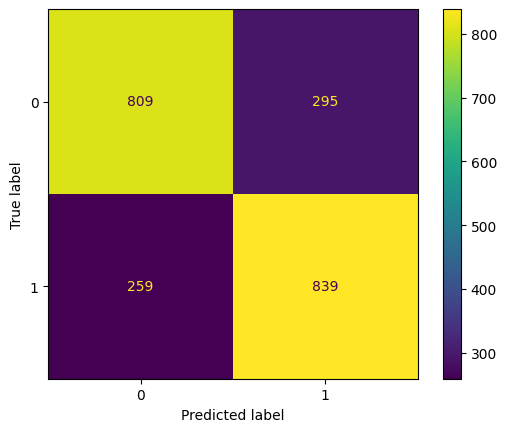

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()



In [ ]:
y_proba = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", roc_auc)

ROC AUC: 0.8342564544230616


In [ ]:
import joblib

joblib.dump(model, f"{MODEL_PATH}\\logreg_pipeline.joblib")

['c:\\Users\\chain\\2nd year\\datasci\\project\\ScopusData2018-2023\\Model\\logreg_pipeline.joblib']